<a href="https://colab.research.google.com/github/HermanMoreno98/Machine_Learning/blob/main/Regresi%C3%B3n_Lineal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importando librerias

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import os
# Delete files if exist data inside 
from shutil import rmtree
import shutil

# Manejo de carpetas en el directorio

In [2]:
#Directorio actual
os.getcwd()

'/content'

In [3]:
# Listar archivos dentro de un directorio
os.listdir()

['.config', 'drive', 'sample_data']

In [4]:
# Crear carpeta
os.mkdir("/content/drive/MyDrive/CURSOS/MACHINE LEARNING/Data/HousePrice")

In [5]:
#Cambiar de directorio
os.chdir("/content/drive/MyDrive/CURSOS/MACHINE LEARNING/Data/HousePrice")

In [6]:
from google.colab import files
files.upload();

Saving kaggle.json to kaggle.json


In [7]:
!pip install -q kaggle
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [8]:
!kaggle datasets download -d shree1992/housedata

  0% 0.00/432k [00:00<?, ?B/s]
100% 432k/432k [00:00<00:00, 7.85MB/s]


In [9]:
! unzip housedata.zip

Archive:  housedata.zip
  inflating: data.csv                
  inflating: data.dat                
  inflating: output.csv              


In [10]:
final_route = "/content/drive/MyDrive/CURSOS/MACHINE LEARNING/Data/"
shutil.move("data.csv", final_route)

'/content/drive/MyDrive/CURSOS/MACHINE LEARNING/Data/data.csv'

In [11]:
#Cambiar de directorio
os.chdir("/content/drive/MyDrive/CURSOS/MACHINE LEARNING/Data/")

In [12]:
#Cambiar nombre de archivo
old_file = "data.csv"
new_file = "house_price_data.csv"
os.rename(old_file, new_file)

In [13]:
#Eliminar directorio
rmtree("HousePrice")

# Cargando dataset

In [84]:
pddf = pd.read_csv('/content/drive/MyDrive/CURSOS/MACHINE LEARNING/Data/house_price_data.csv')
target = 'price'
pddf.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [80]:
pddf.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,year,ant_built,ant_renovated,price_t
count,4.600000e+03,4600.000000,4600.000000,4600.000000,4.600000e+03,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.0,4600.000000,1865.000000,4.600000e+03
mean,5.519630e+05,3.400870,2.160815,2139.346957,1.485252e+04,1.512065,0.007174,0.240652,3.451739,1827.265435,312.081522,1970.786304,808.608261,2014.0,43.213696,19.577480,5.378241e+05
std,5.638347e+05,0.908848,0.783781,963.206916,3.588444e+04,0.538288,0.084404,0.778405,0.677230,862.168977,464.137228,29.731848,979.414536,0.0,29.731848,21.372401,3.279080e+05
min,0.000000e+00,0.000000,0.000000,370.000000,6.380000e+02,1.000000,0.000000,0.000000,1.000000,370.000000,0.000000,1900.000000,0.000000,2014.0,0.000000,0.000000,0.000000e+00
25%,3.228750e+05,3.000000,1.750000,1460.000000,5.000750e+03,1.000000,0.000000,0.000000,3.000000,1190.000000,0.000000,1951.000000,0.000000,2014.0,17.000000,8.000000,3.228750e+05
50%,4.609435e+05,3.000000,2.250000,1980.000000,7.683000e+03,1.500000,0.000000,0.000000,3.000000,1590.000000,0.000000,1976.000000,0.000000,2014.0,38.000000,13.000000,4.609435e+05
75%,6.549625e+05,4.000000,2.500000,2620.000000,1.100125e+04,2.000000,0.000000,0.000000,4.000000,2300.000000,610.000000,1997.000000,1999.000000,2014.0,63.000000,24.000000,6.549625e+05
max,2.659000e+07,9.000000,8.000000,13540.000000,1.074218e+06,3.500000,1.000000,4.000000,5.000000,9410.000000,4820.000000,2014.000000,2014.000000,2014.0,114.000000,102.000000,2.004243e+06


In [82]:
np.percentile(pddf.price,2)

142486.0

In [85]:
#Analizar valores incoherentes del target
pddf = pddf.loc[pddf.price >= 10000]

In [86]:
#Creando algunas variables
pddf['year'] = pddf.date.apply(lambda x: int(x[:4]))
pddf['ant_built'] = pddf.year - pddf.yr_built
pddf['ant_renovated'] = pddf.year - pddf.yr_renovated.apply(lambda x: None if x==0 else x)

<Axes: >

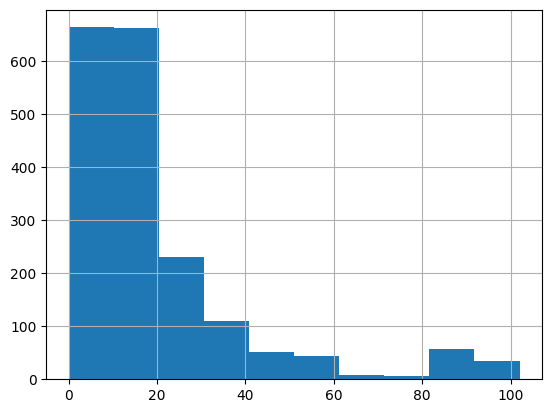

In [16]:
pddf.ant_renovated.hist()

In [18]:
#Por el momento, sólo nos quedamos con variables numericas
pddf.select_dtypes(include='object').columns.tolist()

['date', 'street', 'city', 'statezip', 'country']

In [87]:
features = list(set(pddf.columns.tolist()) - set(['price','year','yr_built','yr_renovated']+pddf.select_dtypes(include='object').columns.tolist()))
data = pddf[features + [target]]

In [20]:
data.head()

,ant_renovated,waterfront,ant_built,sqft_lot,floors,sqft_basement,sqft_above,view,sqft_living,bathrooms,condition,bedrooms,price
0,9.0,0,59,7912,1.5,0,1340,0,1340,1.50,3,3.0,313000.0
1,NaN,0,93,9050,2.0,280,3370,4,3650,2.50,5,5.0,2384000.0
2,NaN,0,48,11947,1.0,0,1930,0,1930,2.00,4,3.0,342000.0
3,NaN,0,51,8030,1.0,1000,1000,0,2000,2.25,4,3.0,420000.0
4,22.0,0,38,10500,1.0,800,1140,0,1940,2.50,4,4.0,550000.0


# Seleccion de muestras

In [88]:
# Muestreo
from sklearn.model_selection import train_test_split

train,test = train_test_split(data,
                              train_size=0.7,
                              random_state=123)

In [89]:
print(f"Total data size {data.shape}")
print(f"Total train size {train.shape}")
print(f"Total test size {test.shape}")

Total data size (4550, 13)
Total train size (3185, 13)
Total test size (1365, 13)


# Analisis univariado de datos

<Axes: xlabel='bathrooms', ylabel='price'>

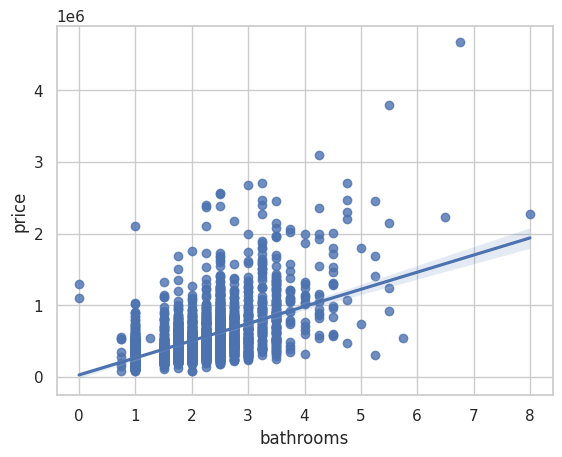

In [90]:
#sns.relplot(x="bathrooms",y="price",data=train.loc[train.price<5000000])
sns.regplot(x="bathrooms",y="price",data=train.loc[train.price<5000000])

In [91]:
univariate = train.describe().transpose()
univariate.reset_index(inplace=True)

In [92]:
#Cambiando nombre de las variables
univariate.rename(columns={
  'index':'feature',
  '25%':'Q1',
  '50%':'Q2',
  '75%':'Q3'
},inplace=True)

In [93]:
#Creando columna de número de missings
univariate['missing_rate'] = 1 - univariate['count'] / train.shape[0]

In [94]:
#Ordenando el dataframe por 'missing_rate'
univariate.sort_values(by='missing_rate',ascending=False, inplace=True)

#¿Que hacer con la variable 'ant_renovated' que tiene un 60% de missing?

In [49]:
univariate.head()

,feature,count,mean,std,min,Q1,Q2,Q3,max,missing_rate
0,ant_renovated,1304.0,19.449387,21.469081,0.0,8.0,13.0,22.00,102.0,0.595031
1,waterfront,3220.0,0.006522,0.080506,0.0,0.0,0.0,0.00,1.0,0.000000
2,ant_built,3220.0,43.188199,29.748077,0.0,17.0,38.0,63.00,114.0,0.000000
3,sqft_lot,3220.0,15021.657764,33898.239766,638.0,5040.0,7730.0,11071.25,641203.0,0.000000
4,floors,3220.0,1.510870,0.539988,1.0,1.0,1.5,2.00,3.5,0.000000


In [95]:
# Analisis de correlaciones
corr_matrix = train.corr()
corr_matrix.reset_index(inplace=True)
corr_matrix.rename(columns={'index':'feature',target:'correl'},inplace=True)
corr_matrix = corr_matrix[['feature','correl']]
corr_matrix.head()

,feature,correl
0,ant_renovated,0.039901
1,waterfront,0.154196
2,ant_built,-0.021407
3,sqft_lot,0.048334
4,floors,0.132755


In [96]:
#Cruce para obtener las variables más importantes que se relacionan con el target
univariate_II = pd.merge(univariate,corr_matrix,on='feature',how='inner')
univariate_II['correl_abs'] = univariate_II.correl.apply(lambda x: abs(x))
univariate_II.sort_values(by='correl_abs', ascending=False, inplace=True)
univariate_II.head()

,feature,count,mean,std,min,Q1,Q2,Q3,max,missing_rate,correl,correl_abs
12,price,3185.0,559046.654641,627775.352934,80000.0,329350.00,465000.00,650000.0,26590000.0,0.0,1.000000,1.000000
8,sqft_living,3185.0,2134.329356,951.982266,370.0,1470.00,1980.00,2600.0,13540.0,0.0,0.396258,0.396258
6,sqft_above,3185.0,1819.907064,848.854618,370.0,1200.00,1590.00,2290.0,9410.0,0.0,0.335910,0.335910
9,bathrooms,3185.0,2.163658,0.774415,0.0,1.75,2.25,2.5,8.0,0.0,0.303729,0.303729
7,view,3185.0,0.236735,0.766261,0.0,0.00,0.00,0.0,4.0,0.0,0.225895,0.225895


<Axes: xlabel='sqft_living', ylabel='price'>

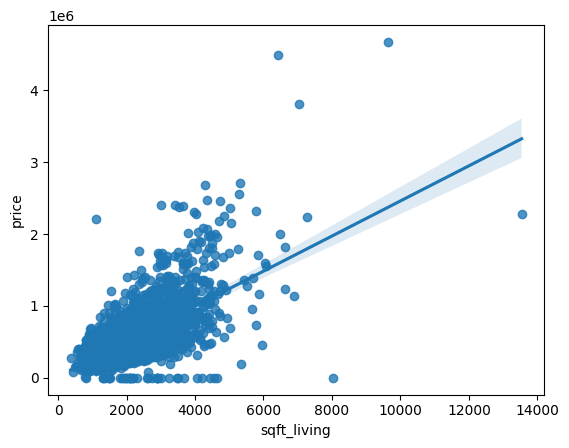

In [56]:
# Se evidencia algunos outliers
sns.regplot(x="sqft_living",y="price",data=train.loc[train.price<5000000])

# Pre-selección de variables

Es importante en esta etapa identificar aquellos features con mayor potencial para predecir el target. Se pueden establecer umbrales como por ejm, excluir corr<0.1 y missing_rate>0.9

In [97]:
feature_prefilter = list(set(univariate_II.loc[(univariate_II.correl_abs>=0.1) & (univariate_II.missing_rate<=0.9)].feature.tolist()) - set([target]))

In [98]:
print(f"# de variables iniciales {univariate_II.shape[0]}")
print(f"# de variables finales {len(feature_prefilter)}")

# de variables iniciales 13
# de variables finales 8


# Analizando el target

In [102]:
pddf.price.describe()

count    4.550000e+03
mean     5.580268e+05
std      5.639329e+05
min      8.000000e+04
25%      3.264464e+05
50%      4.650000e+05
75%      6.575000e+05
max      2.659000e+07
Name: price, dtype: float64

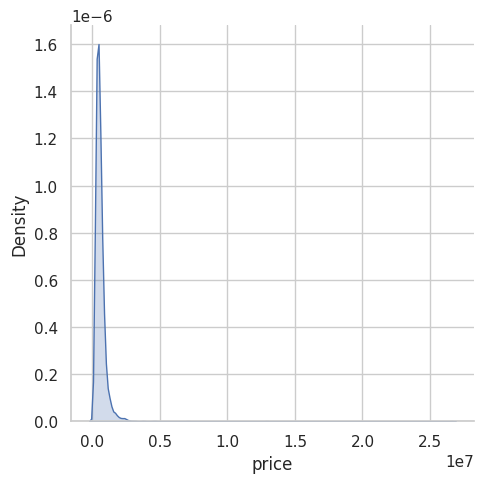

In [101]:
sns.displot(pddf.price, kind="kde", fill=True)

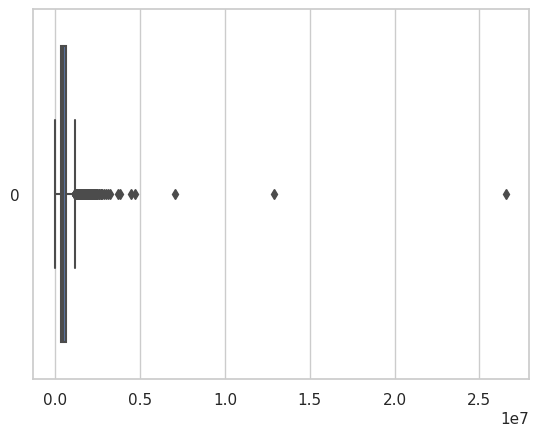

In [75]:
#Boxplot
sns.set_theme(style="whitegrid")
ax = sns.boxplot(data=pddf.price, orient="h")

# Tratamiento de outliers del target por z-score (CAPPING)

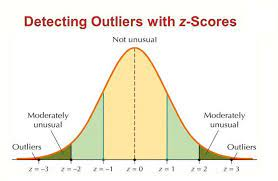

In [105]:
# Tratamiento por z-score (99% de confianza) -> Capping: truncar los valores extremos consiste en imputar los valores limites.
# 99% confianza -> z=3.576
# 95% confianza -> z=1.96
# Asume que los datos siguen una distribucion normal
upper_limit = np.mean(pddf.price) + 1.96*np.std(pddf.price)
lower_limit = np.mean(pddf.price) - 1.96*np.std(pddf.price)

pddf["price_t"] = pddf.price.apply(lambda x: upper_limit if x > upper_limit
                 else lower_limit if x < lower_limit else x)

In [106]:
#El valor del lower limit se va muy a la izquierda debido a la desviacion estandar, porque justamente el tratamient por z-score asume una dist. normal
lower_limit

-547160.1348601585

In [107]:
np.mean(pddf.price)

558026.8015333592

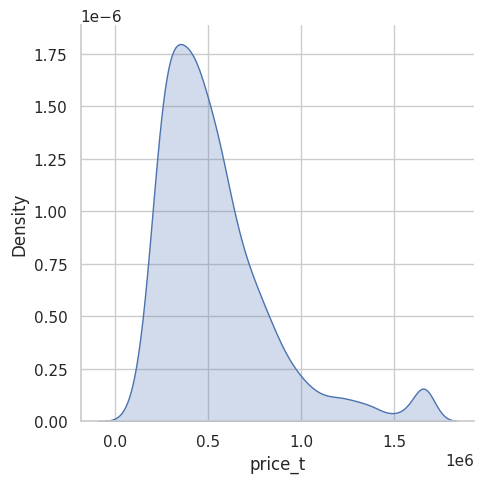

In [108]:
sns.displot(pddf.price_t, kind="kde", fill=True)

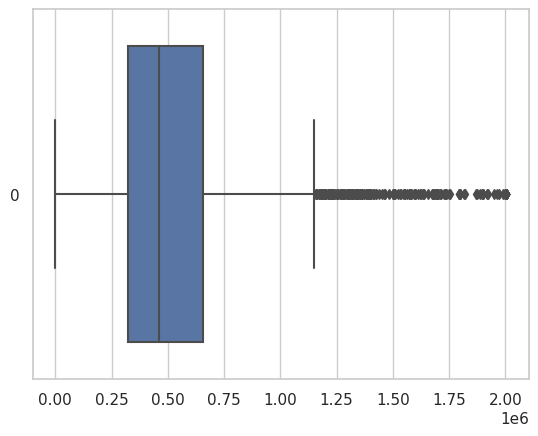

In [78]:
sns.set_theme(style="whitegrid")
ax = sns.boxplot(data=pddf.price_t, orient="h")

<Axes: >

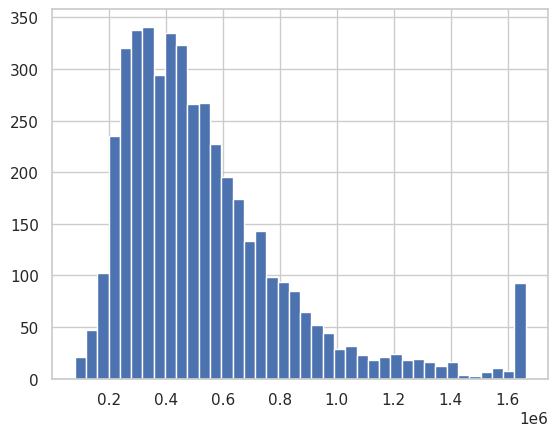

In [109]:
pddf.price_t.hist(bins=40)

# Tratamiento por z-score de los faetures


In [110]:
#Calculando los intervalos
univariate_II["li_zscore"] = univariate_II["mean"] - 1.96*univariate_II["std"]
univariate_II["ls_zscore"] = univariate_II["mean"] + 1.96*univariate_II["std"]

univariate_II.head()

,feature,count,mean,std,min,Q1,Q2,Q3,max,missing_rate,correl,correl_abs,li_zscore,ls_zscore
12,price,3185.0,559046.654641,627775.352934,80000.0,329350.00,465000.00,650000.0,26590000.0,0.0,1.000000,1.000000,-671393.037110,1.789486e+06
8,sqft_living,3185.0,2134.329356,951.982266,370.0,1470.00,1980.00,2600.0,13540.0,0.0,0.396258,0.396258,268.444116,4.000215e+03
6,sqft_above,3185.0,1819.907064,848.854618,370.0,1200.00,1590.00,2290.0,9410.0,0.0,0.335910,0.335910,156.152013,3.483662e+03
9,bathrooms,3185.0,2.163658,0.774415,0.0,1.75,2.25,2.5,8.0,0.0,0.303729,0.303729,0.645804,3.681512e+00
7,view,3185.0,0.236735,0.766261,0.0,0.00,0.00,0.0,4.0,0.0,0.225895,0.225895,-1.265136,1.738605e+00


In [111]:
def calculate_zscore(dataframe,univariate,features_treatment):
  for col in features_treatment:
    desc = univariate.loc[univariate.feature==col]
    dataframe[col + "_tzscore"] = dataframe[col].apply(lambda x: desc.ls_zscore.values[0] if x > desc.ls_zscore.values[0]
                                                     else desc.li_zscore.values[0] if x < desc.li_zscore.values[0]
                                                     else x)
  return dataframe

In [112]:
train_I = calculate_zscore(train,univariate_II,univariate_II.feature.tolist())
test_I = calculate_zscore(test,univariate_II,univariate_II.feature.tolist())

In [ ]:
train_I